In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

Построить временной ряд с суммами покупки

Построить временной ряд где мы смотрим по промежуток между покупками

Интерполяция функции по временному ряду


In [3]:
data = pd.read_parquet(r"D:\MyFolder\2.Work\DigitalBreaktrough\cifrovoi_proriv_hakaton\data\raw\train_dataset_hackaton2023_train.gzip")


In [4]:
data

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name
0,29891,9.0,1,train,69.99,2022-12-05 12:03:58,Кинг Фри станд,300.0,Отдельно стоящий без внешней зоны
1,29891,9.0,1,train,190.00,2022-12-05 12:03:58,Чикен Тар-Тар,300.0,Отдельно стоящий без внешней зоны
2,29891,9.0,1,train,9.99,2022-12-05 12:03:58,Соус Сырный,300.0,Отдельно стоящий без внешней зоны
3,29891,9.0,1,train,119.99,2022-12-05 12:03:58,Энергет.нап. Адреналин Раш,300.0,Отдельно стоящий без внешней зоны
4,29891,9.0,1,train,119.99,2022-12-05 14:28:35,Латте (СТАНД.),300.0,Отдельно стоящий без внешней зоны
...,...,...,...,...,...,...,...,...,...
24261974,46661804,NaN,0,train,7.99,2023-08-01 18:04:56,"Эвервесс Кола джун 0,3л",300.0,Фудкорт с туалетом
24261975,46661804,NaN,0,train,84.98,2023-08-01 18:04:56,Воппер Джуниор,300.0,Фудкорт с туалетом
24261976,46661804,NaN,0,train,70.03,2023-08-01 18:04:56,Наггетсы (3 шт.),300.0,Фудкорт с туалетом
24261977,46661804,NaN,0,train,19.00,2023-08-01 18:04:56,Сырные Медальоны (3 шт.),300.0,Фудкорт с туалетом


In [6]:
data_sorted = data.sort_values(by=['customer_id', 'startdatetime'])

# Добавление столбца с разницей времени
data_sorted['time_diff'] = data_sorted.groupby('customer_id')['startdatetime'].diff()

# Идентификация новых заказов
threshold1 = pd.Timedelta('1 day')  # Пороговое значение, можно изменить по необходимости
data_sorted['new_order'] = data_sorted['time_diff'] > threshold1

# Преобразование разницы во времени в количество дней (float)
data_sorted['time_diff_days'] = data_sorted['time_diff'].dt.days.astype(float)

# Группировка и сбор результатов
result = data_sorted.groupby('customer_id')['time_diff_days'].agg(list)

In [7]:
result

customer_id
29891       [nan, 0.0, 0.0, 0.0, 0.0, 9.0, 0.0, 5.0, 1.0, ...
30477       [nan, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
31426       [nan, 0.0, 0.0, 6.0, 0.0, 0.0, 4.0, 0.0, 0.0, ...
44491       [nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 26.0, 0.0,...
44939       [nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                                  ...                        
46624509    [nan, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
46625265    [nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
46639170    [nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
46654016                       [nan, 0.0, 0.0, 0.0, 0.0, 0.0]
46661804    [nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: time_diff_days, Length: 500000, dtype: object

In [8]:
result_modified = result.apply(lambda x: x[1:] if len(x) > 1 else x)
result_modified

customer_id
29891       [0.0, 0.0, 0.0, 0.0, 9.0, 0.0, 5.0, 1.0, 0.0, ...
30477       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, ...
31426       [0.0, 0.0, 6.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, ...
44491          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 26.0, 0.0, 0.0]
44939       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, ...
                                  ...                        
46624509    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
46625265    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
46639170    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
46654016                            [0.0, 0.0, 0.0, 0.0, 0.0]
46661804    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: time_diff_days, Length: 500000, dtype: object

In [9]:
result_modified[46661804]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [10]:
result_modified = result_modified.apply(lambda x: [item for item in x if item != 0] if x else x)
result_modified.tail(10)

customer_id
46598535       []
46599400       []
46606537    [1.0]
46609455    [1.0]
46617009       []
46624509    [1.0]
46625265       []
46639170       []
46654016       []
46661804       []
Name: time_diff_days, dtype: object

## Изучение возвращаемости клиентов

In [11]:
data[data["customer_id"]==29891]

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name
0,29891,9.0,1,train,69.99,2022-12-05 12:03:58,Кинг Фри станд,300.0,Отдельно стоящий без внешней зоны
1,29891,9.0,1,train,190.00,2022-12-05 12:03:58,Чикен Тар-Тар,300.0,Отдельно стоящий без внешней зоны
2,29891,9.0,1,train,9.99,2022-12-05 12:03:58,Соус Сырный,300.0,Отдельно стоящий без внешней зоны
3,29891,9.0,1,train,119.99,2022-12-05 12:03:58,Энергет.нап. Адреналин Раш,300.0,Отдельно стоящий без внешней зоны
4,29891,9.0,1,train,119.99,2022-12-05 14:28:35,Латте (СТАНД.),300.0,Отдельно стоящий без внешней зоны
5,29891,9.0,1,train,60.00,2022-12-15 00:37:19,Чизбургер,463.0,Отдельно стоящий с внешней зоной
6,29891,9.0,1,train,209.99,2022-12-15 00:37:19,Воппер Ролл,463.0,Отдельно стоящий с внешней зоной
7,29891,9.0,1,train,144.97,2022-12-20 09:20:38,ЧизБекон Чикен Гамбургер,463.0,Отдельно стоящий с внешней зоной
8,29891,9.0,1,train,184.96,2022-12-21 09:46:23,Цезарь Кинг новый,463.0,Отдельно стоящий с внешней зоной
9,29891,9.0,1,train,84.99,2022-12-21 13:12:09,Flash Up,463.0,Отдельно стоящий с внешней зоной


In [12]:
result_sorted = result_modified.apply(len).sort_values(ascending=False)

In [13]:
result_zero = result_sorted[result_sorted < 10]

In [14]:
100 - len(result_sorted[result_sorted == 1])/5000

85.9058

In [15]:
result_df = pd.DataFrame({'time_series': result_modified, 'quant_of_days': result_sorted})
result_df

,time_series,quant_of_days
customer_id,,
29891,"[9.0, 5.0, 1.0, 1.0, 2.0, 1.0, 1.0, 11.0, 2.0,...",13
30477,"[1.0, 4.0, 6.0, 9.0, 2.0, 1.0, 7.0, 3.0, 2.0, ...",10
31426,"[6.0, 4.0, 6.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",17
44491,[26.0],1
44939,"[7.0, 8.0]",2
...,...,...
46624509,[1.0],1
46625265,[],0
46639170,[],0


In [16]:
append_df = pd.merge(data,result_df, on="customer_id")

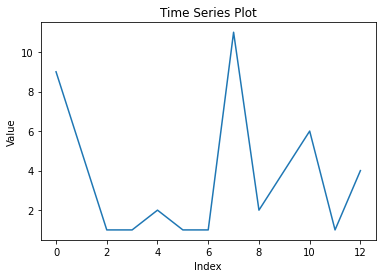

Extrapolated value: 10.52097902097843
Real value: 9.0


In [17]:
first_row = append_df.iloc[2]


# Построим график значений time_series
plt.plot(first_row['time_series'])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Time Series Plot')
plt.show()

# Проведем экстраполяцию для получения следующего значения
if first_row['quant_of_days'] > 0:
    # Если есть хотя бы одно значение в time_series, используем numpy.polyfit для линейной экстраполяции
    coefficients = np.polyfit(range(len(first_row['time_series'])), first_row['time_series'], 5)
    extrapolated_value = np.polyval(coefficients, len(first_row['time_series']))
else:
    # Если time_series пуст, установим экстраполированное значение в 0
    extrapolated_value = 0

print(f'Extrapolated value: {extrapolated_value}')
print(f'Real value: {first_row["date_diff_post"]}')

In [18]:
# Преобразование столбца startdatetime в тип datetime
append_df['startdatetime'] = pd.to_datetime(append_df['startdatetime'])

# Сортировка DataFrame по времени в порядке убывания
df_sorted = append_df.sort_values(by='startdatetime', ascending=False)

# Группировка по customer_id и выбор последних строк
latest_orders = df_sorted.groupby('customer_id').head(1)
latest_orders = latest_orders[latest_orders["quant_of_days"]!=0]
latest_orders = latest_orders.fillna(90)

In [19]:
latest_orders


,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name,time_series,quant_of_days
12052065,44695278,5.0,1,train,99.99,2023-08-01 23:57:46,Чай черный станд,284.8,Отдельно стоящий,"[12.0, 2.0, 4.0, 4.0, 6.0, 2.0, 1.0]",7
10159482,30984546,3.0,1,train,229.99,2023-08-01 23:57:36,Гранд Чиз Фреш,291.1,Отдельно стоящий с внешней зоной,"[11.0, 18.0, 8.0, 9.0, 1.0]",5
6682378,22436078,5.0,1,train,99.99,2023-08-01 23:54:12,Up Карт. Деревен. станд,346.4,Отдельно стоящий,"[2.0, 39.0, 1.0, 1.0]",4
11819868,41586357,23.0,1,train,49.99,2023-08-01 23:54:09,Пирожок с вишней,501.3,Отдельно стоящий с внешней зоной,"[13.0, 4.0, 11.0, 2.0, 2.0, 4.0]",6
12125210,46198579,44.0,1,train,149.99,2023-08-01 23:53:26,Шоколадный Шейк станд,282.1,Отдельно стоящий без внешней зоны,"[2.0, 6.0, 6.0]",3
...,...,...,...,...,...,...,...,...,...,...,...
1671344,6367754,90.0,0,train,74.99,2022-09-04 10:14:38,Чикенбургер,366.1,Отдельно стоящий с внешней зоной,[1.0],1
10718343,34504820,90.0,0,train,89.99,2022-09-04 00:13:08,Чизбургер,380.0,Отдельно стоящий с внешней зоной,[1.0],1
10413577,32670292,90.0,0,train,59.99,2022-09-03 22:12:26,Чизбургер,262.0,Отдельно стоящий без внешней зоны,[1.0],1
3950206,12316108,90.0,0,train,199.99,2022-09-03 16:21:48,Гранд Чиз,405.0,Отдельно стоящий,[1.0],1


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [22]:
df_pred = latest_orders


def predict_next_value(time_series, date_diff_post):
    if not time_series:
        return 0  # Если временной ряд пуст, возвращаем 0
    elif len(time_series) < 2:
        return 0  # Если не хватает данных для предсказания, возвращаем 0
    else:
        X = [[i] for i in range(1, len(time_series) + 1)]
        y = time_series

        model = LinearRegression()
        model.fit(X, y)

        next_value = model.predict([[len(time_series) + date_diff_post]])
        # return 0 if next_value > 60 else 1, pd.Series(next_value)
        return next_value
# Применяем функцию для создания столбца pred_buy_post
# df_pred['pred_buy_post'],
df_pred["pred_date_diff_post"] = df_pred.apply(lambda row: predict_next_value(row['time_series'], row['date_diff_post']), axis=1)

print(df_pred)

          customer_id  date_diff_post  buy_post group_name  revenue  \
12052065     44695278             5.0         1      train    99.99   
10159482     30984546             3.0         1      train   229.99   
6682378      22436078             5.0         1      train    99.99   
11819868     41586357            23.0         1      train    49.99   
12125210     46198579            44.0         1      train   149.99   
...               ...             ...       ...        ...      ...   
1671344       6367754            90.0         0      train    74.99   
10718343     34504820            90.0         0      train    89.99   
10413577     32670292            90.0         0      train    59.99   
3950206      12316108            90.0         0      train   199.99   
4834036      17912758            90.0         0      train   339.98   

               startdatetime                dish_name  ownareaall_sqm  \
12052065 2023-08-01 23:57:46         Чай черный станд           284.8   
1

In [28]:
len(latest_orders[latest_orders["quant_of_days"]<=1])/5000 

83.732

In [31]:
3-(13*3/55)

2.290909090909091

In [23]:
df_pred

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name,time_series,quant_of_days,pred_date_diff_post
12052065,44695278,5.0,1,train,99.99,2023-08-01 23:57:46,Чай черный станд,284.8,Отдельно стоящий,"[12.0, 2.0, 4.0, 4.0, 6.0, 2.0, 1.0]",7,[-4.428571428571425]
10159482,30984546,3.0,1,train,229.99,2023-08-01 23:57:36,Гранд Чиз Фреш,291.1,Отдельно стоящий с внешней зоной,"[11.0, 18.0, 8.0, 9.0, 1.0]",5,[-5.099999999999998]
6682378,22436078,5.0,1,train,99.99,2023-08-01 23:54:12,Up Карт. Деревен. станд,346.4,Отдельно стоящий,"[2.0, 39.0, 1.0, 1.0]",4,[-15.899999999999995]
11819868,41586357,23.0,1,train,49.99,2023-08-01 23:54:09,Пирожок с вишней,501.3,Отдельно стоящий с внешней зоной,"[13.0, 4.0, 11.0, 2.0, 2.0, 4.0]",6,[-37.714285714285715]
12125210,46198579,44.0,1,train,149.99,2023-08-01 23:53:26,Шоколадный Шейк станд,282.1,Отдельно стоящий без внешней зоны,"[2.0, 6.0, 6.0]",3,[94.66666666666663]
...,...,...,...,...,...,...,...,...,...,...,...,...
1671344,6367754,90.0,0,train,74.99,2022-09-04 10:14:38,Чикенбургер,366.1,Отдельно стоящий с внешней зоной,[1.0],1,0
10718343,34504820,90.0,0,train,89.99,2022-09-04 00:13:08,Чизбургер,380.0,Отдельно стоящий с внешней зоной,[1.0],1,0
10413577,32670292,90.0,0,train,59.99,2022-09-03 22:12:26,Чизбургер,262.0,Отдельно стоящий без внешней зоны,[1.0],1,0
3950206,12316108,90.0,0,train,199.99,2022-09-03 16:21:48,Гранд Чиз,405.0,Отдельно стоящий,[1.0],1,0


In [24]:
from sklearn.metrics import f1_score

In [25]:
f1 = f1_score(df_pred["buy_post"], df_pred["pred_buy_post"])

KeyError: 'pred_buy_post'

In [ ]:
f1

0.72484305579733

In [ ]:
submission = df_pred["customer_id","pred_buy_post","pred_date_diff_post"]